In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading, cleaning and visualising data to apply machine learning models

In [2]:
dataFile = pd.read_csv('Job.csv')

In [3]:
dataFile.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39156    False
39157    False
39158    False
39159    False
39160    False
Length: 39161, dtype: bool

In [4]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [5]:
dataFile.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [6]:
dataFile.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
dataFile.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
dataFile.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [9]:
len(dataFile)

39161

In [10]:
dataFile['buy'].unique()

array([0, 1], dtype=int64)

In [11]:
dataFile['signup_date'].fillna(method = 'ffill', inplace = True)

In [12]:
dataFile['buy'].unique()

array([0, 1], dtype=int64)

In [13]:
dataFile.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date                 0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [14]:
med = dataFile['products_purchased'].median()

In [15]:
dataFile['products_purchased'].fillna(med, inplace = True)

In [16]:
dataFile.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [17]:
dataFile['buy'].unique()

array([0, 1], dtype=int64)

In [18]:
dataFile.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [19]:
dataFile['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [20]:
dataFile.drop('id', axis = 1, inplace = True)

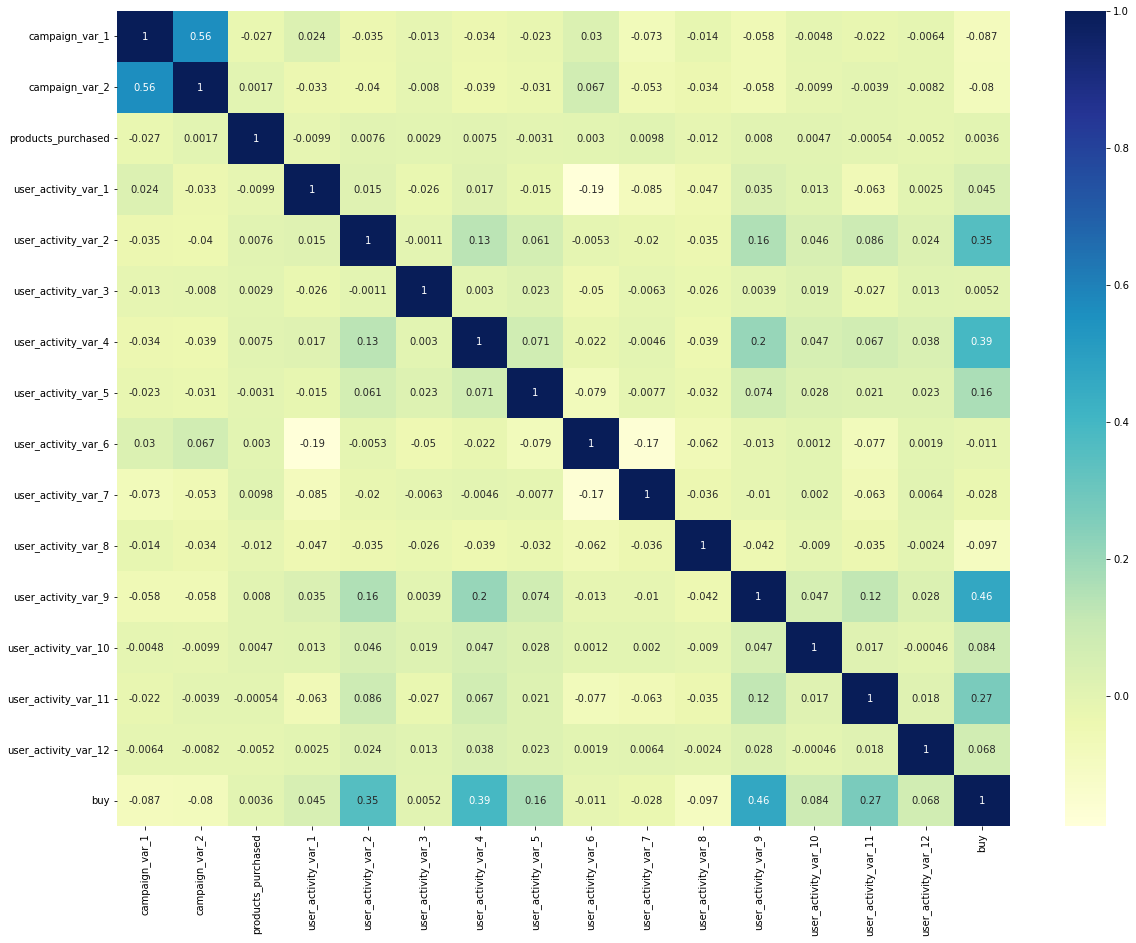

In [21]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(dataFile.corr(), cmap ='YlGnBu', annot = True);

In [22]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    39161 non-null  float64
 4   signup_date           39161 non-null  object 
 5   user_activity_var_1   39161 non-null  int64  
 6   user_activity_var_2   39161 non-null  int64  
 7   user_activity_var_3   39161 non-null  int64  
 8   user_activity_var_4   39161 non-null  int64  
 9   user_activity_var_5   39161 non-null  int64  
 10  user_activity_var_6   39161 non-null  int64  
 11  user_activity_var_7   39161 non-null  int64  
 12  user_activity_var_8   39161 non-null  int64  
 13  user_activity_var_9   39161 non-null  int64  
 14  user_activity_var_10  39161 non-null  int64  
 15  user_activity_var_1

In [23]:
dataFile['created_at'] = pd.to_datetime(dataFile['created_at'])

In [24]:
dataFile['signup_date'] = pd.to_datetime(dataFile['signup_date'])

In [25]:
dataFile.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [26]:
dataFile['created_at_year'] = dataFile['created_at'].dt.year
dataFile['created_at_month'] = dataFile['created_at'].dt.month
dataFile['created_at_day'] = dataFile['created_at'].dt.day

In [27]:
dataFile['signup_dateYear'] = dataFile['signup_date'].dt.year
dataFile['signup_dateMonth'] = dataFile['signup_date'].dt.month
dataFile['signup_dateDay'] = dataFile['signup_date'].dt.day

In [28]:
dataFile.drop('created_at', axis = 1, inplace = True)

In [29]:
dataFile.drop('signup_date', axis = 1, inplace = True)

In [30]:
dataFile.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_day,signup_dateYear,signup_dateMonth,signup_dateDay
0,1,2,2.0,0,0,0,0,0,0,1,...,0,0,0,0,2021,1,1,2020,9,24
1,2,1,2.0,1,0,1,0,0,0,1,...,0,0,0,0,2021,1,1,2020,9,19
2,9,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2021,8,11
3,6,7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2017,10,4
4,4,6,2.0,0,0,0,0,0,0,1,...,0,1,0,0,2021,1,1,2020,6,8


In [31]:
feature = dataFile.drop('buy', axis = 1)

In [32]:
target = dataFile['buy']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature, target, random_state = 0, train_size = 0.72)

Using baseline model gaussian naive bayes

In [35]:
model = GaussianNB()
predictGau = model.fit(Xtrain, Ytrain).predict(Xtest)

In [36]:
predictGau

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
accuracy_score(Ytest, predictGau)
print(classification_report(Ytest, predictGau))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10396
           1       0.94      0.44      0.60       570

    accuracy                           0.97     10966
   macro avg       0.95      0.72      0.79     10966
weighted avg       0.97      0.97      0.96     10966



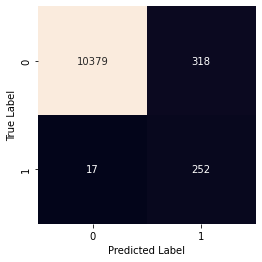

In [38]:
mat = confusion_matrix(Ytest, predictGau)
sns.heatmap(mat.T, square = True, annot=True, fmt='d', cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

Using random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(Xtrain, Ytrain)

RandomForestClassifier(random_state=0)

In [40]:
rPredict = model.predict(Xtest)

In [46]:
accuracy_score(Ytest, rPredict)

0.9733722414736458

In [41]:
print(classification_report(Ytest, rPredict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10396
           1       0.95      0.52      0.67       570

    accuracy                           0.97     10966
   macro avg       0.96      0.76      0.83     10966
weighted avg       0.97      0.97      0.97     10966



In [65]:
len(dataFile)

39161

In [42]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Applying RandomizedSearchCV to random forest classifier

In [43]:
# # We will try adjusting following hyperparameters
# n_estimators
# max_features
# max_depth
# min_samples_split
# min_samples_leaf
# bootstrap

#create a parameter grid to sample
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#  Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#method of selecting samples for training each tree
bootstrap = [True, False]

#create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [44]:
#random search training
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose = 2, random_state = 41, n_jobs = -1)
#fit the random search model
rf_random.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=41, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [49]:
rf_randomPred = rf_random.predict(Xtest)

In [50]:
accuracy_score(Ytest, rf_randomPred)

0.9736458143352179

In [51]:
print(classification_report(Ytest, rf_randomPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10396
           1       0.95      0.52      0.67       570

    accuracy                           0.97     10966
   macro avg       0.96      0.76      0.83     10966
weighted avg       0.97      0.97      0.97     10966



Applying GridSearchCV to random forest classifier

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth':[30, 40, 50, 60, 70],
    'max_features':[2,3],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,200,300,1000]
    
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [58]:
grid_search.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [30, 40, 50, 60, 70],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [59]:
 grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [60]:
gridPredict = grid_search.predict(Xtest)

In [61]:
accuracy_score(Ytest, gridPredict)

0.9736458143352179

In [62]:
print(classification_report(Ytest,gridPredict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10396
           1       0.95      0.52      0.67       570

    accuracy                           0.97     10966
   macro avg       0.96      0.76      0.83     10966
weighted avg       0.97      0.97      0.97     10966



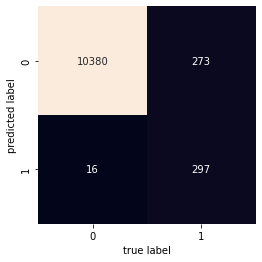

In [64]:
mat2 = confusion_matrix(Ytest, gridPredict)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Using catBoost classifier

In [67]:
from catboost import CatBoostClassifier

In [69]:
mod = CatBoostClassifier()
mod.fit(Xtrain, Ytrain)

Learning rate set to 0.04287
0:	learn: 0.6251924	total: 199ms	remaining: 3m 19s
1:	learn: 0.5597019	total: 225ms	remaining: 1m 52s
2:	learn: 0.5072131	total: 248ms	remaining: 1m 22s
3:	learn: 0.4600520	total: 269ms	remaining: 1m 7s
4:	learn: 0.4171917	total: 289ms	remaining: 57.6s
5:	learn: 0.3780733	total: 310ms	remaining: 51.4s
6:	learn: 0.3466088	total: 330ms	remaining: 46.9s
7:	learn: 0.3154366	total: 350ms	remaining: 43.4s
8:	learn: 0.2925601	total: 369ms	remaining: 40.7s
9:	learn: 0.2688374	total: 389ms	remaining: 38.5s
10:	learn: 0.2493392	total: 410ms	remaining: 36.9s
11:	learn: 0.2321975	total: 431ms	remaining: 35.5s
12:	learn: 0.2192306	total: 453ms	remaining: 34.4s
13:	learn: 0.2069356	total: 474ms	remaining: 33.4s
14:	learn: 0.1963340	total: 493ms	remaining: 32.4s
15:	learn: 0.1874038	total: 512ms	remaining: 31.5s
16:	learn: 0.1790839	total: 531ms	remaining: 30.7s
17:	learn: 0.1720960	total: 550ms	remaining: 30s
18:	learn: 0.1639490	total: 570ms	remaining: 29.4s
19:	learn: 

172:	learn: 0.0871048	total: 2.72s	remaining: 13s
173:	learn: 0.0870446	total: 2.73s	remaining: 13s
174:	learn: 0.0869782	total: 2.74s	remaining: 12.9s
175:	learn: 0.0868983	total: 2.75s	remaining: 12.9s
176:	learn: 0.0868092	total: 2.76s	remaining: 12.9s
177:	learn: 0.0867309	total: 2.77s	remaining: 12.8s
178:	learn: 0.0866791	total: 2.79s	remaining: 12.8s
179:	learn: 0.0865363	total: 2.8s	remaining: 12.7s
180:	learn: 0.0864832	total: 2.81s	remaining: 12.7s
181:	learn: 0.0864437	total: 2.82s	remaining: 12.7s
182:	learn: 0.0864208	total: 2.83s	remaining: 12.6s
183:	learn: 0.0863932	total: 2.84s	remaining: 12.6s
184:	learn: 0.0863682	total: 2.85s	remaining: 12.5s
185:	learn: 0.0862879	total: 2.86s	remaining: 12.5s
186:	learn: 0.0862671	total: 2.87s	remaining: 12.5s
187:	learn: 0.0862138	total: 2.88s	remaining: 12.4s
188:	learn: 0.0861848	total: 2.89s	remaining: 12.4s
189:	learn: 0.0860990	total: 2.9s	remaining: 12.4s
190:	learn: 0.0860591	total: 2.91s	remaining: 12.3s
191:	learn: 0.0859

335:	learn: 0.0785348	total: 4.47s	remaining: 8.83s
336:	learn: 0.0785043	total: 4.48s	remaining: 8.81s
337:	learn: 0.0784616	total: 4.49s	remaining: 8.79s
338:	learn: 0.0784030	total: 4.5s	remaining: 8.77s
339:	learn: 0.0783420	total: 4.51s	remaining: 8.75s
340:	learn: 0.0783110	total: 4.52s	remaining: 8.73s
341:	learn: 0.0782965	total: 4.53s	remaining: 8.71s
342:	learn: 0.0782624	total: 4.54s	remaining: 8.7s
343:	learn: 0.0781957	total: 4.55s	remaining: 8.68s
344:	learn: 0.0781476	total: 4.56s	remaining: 8.66s
345:	learn: 0.0780921	total: 4.57s	remaining: 8.64s
346:	learn: 0.0780657	total: 4.58s	remaining: 8.62s
347:	learn: 0.0780544	total: 4.59s	remaining: 8.6s
348:	learn: 0.0780150	total: 4.6s	remaining: 8.58s
349:	learn: 0.0779873	total: 4.61s	remaining: 8.56s
350:	learn: 0.0778839	total: 4.62s	remaining: 8.54s
351:	learn: 0.0778683	total: 4.63s	remaining: 8.52s
352:	learn: 0.0778332	total: 4.64s	remaining: 8.5s
353:	learn: 0.0778020	total: 4.65s	remaining: 8.48s
354:	learn: 0.077

510:	learn: 0.0708192	total: 6.24s	remaining: 5.97s
511:	learn: 0.0707713	total: 6.25s	remaining: 5.96s
512:	learn: 0.0707573	total: 6.26s	remaining: 5.94s
513:	learn: 0.0707055	total: 6.27s	remaining: 5.93s
514:	learn: 0.0706607	total: 6.28s	remaining: 5.91s
515:	learn: 0.0706271	total: 6.29s	remaining: 5.9s
516:	learn: 0.0705473	total: 6.3s	remaining: 5.88s
517:	learn: 0.0704906	total: 6.31s	remaining: 5.87s
518:	learn: 0.0704505	total: 6.32s	remaining: 5.86s
519:	learn: 0.0704288	total: 6.33s	remaining: 5.84s
520:	learn: 0.0703875	total: 6.34s	remaining: 5.83s
521:	learn: 0.0703634	total: 6.35s	remaining: 5.81s
522:	learn: 0.0703308	total: 6.36s	remaining: 5.8s
523:	learn: 0.0702974	total: 6.37s	remaining: 5.78s
524:	learn: 0.0702134	total: 6.38s	remaining: 5.77s
525:	learn: 0.0701681	total: 6.39s	remaining: 5.75s
526:	learn: 0.0701267	total: 6.39s	remaining: 5.74s
527:	learn: 0.0700674	total: 6.41s	remaining: 5.72s
528:	learn: 0.0700344	total: 6.41s	remaining: 5.71s
529:	learn: 0.0

682:	learn: 0.0640614	total: 7.95s	remaining: 3.69s
683:	learn: 0.0640397	total: 7.96s	remaining: 3.68s
684:	learn: 0.0640287	total: 7.97s	remaining: 3.67s
685:	learn: 0.0639675	total: 7.98s	remaining: 3.65s
686:	learn: 0.0639100	total: 7.99s	remaining: 3.64s
687:	learn: 0.0638531	total: 8s	remaining: 3.63s
688:	learn: 0.0638326	total: 8.01s	remaining: 3.62s
689:	learn: 0.0638269	total: 8.02s	remaining: 3.6s
690:	learn: 0.0637900	total: 8.03s	remaining: 3.59s
691:	learn: 0.0636892	total: 8.04s	remaining: 3.58s
692:	learn: 0.0636830	total: 8.05s	remaining: 3.56s
693:	learn: 0.0636754	total: 8.05s	remaining: 3.55s
694:	learn: 0.0636421	total: 8.06s	remaining: 3.54s
695:	learn: 0.0636135	total: 8.07s	remaining: 3.53s
696:	learn: 0.0635797	total: 8.08s	remaining: 3.51s
697:	learn: 0.0635740	total: 8.09s	remaining: 3.5s
698:	learn: 0.0635273	total: 8.1s	remaining: 3.49s
699:	learn: 0.0635033	total: 8.11s	remaining: 3.48s
700:	learn: 0.0634637	total: 8.12s	remaining: 3.46s
701:	learn: 0.0634

862:	learn: 0.0582699	total: 9.64s	remaining: 1.53s
863:	learn: 0.0582220	total: 9.65s	remaining: 1.52s
864:	learn: 0.0581874	total: 9.65s	remaining: 1.51s
865:	learn: 0.0581598	total: 9.66s	remaining: 1.5s
866:	learn: 0.0581555	total: 9.67s	remaining: 1.48s
867:	learn: 0.0581368	total: 9.68s	remaining: 1.47s
868:	learn: 0.0581121	total: 9.69s	remaining: 1.46s
869:	learn: 0.0580881	total: 9.7s	remaining: 1.45s
870:	learn: 0.0580495	total: 9.7s	remaining: 1.44s
871:	learn: 0.0579987	total: 9.71s	remaining: 1.43s
872:	learn: 0.0579644	total: 9.72s	remaining: 1.41s
873:	learn: 0.0579561	total: 9.73s	remaining: 1.4s
874:	learn: 0.0579349	total: 9.73s	remaining: 1.39s
875:	learn: 0.0579098	total: 9.74s	remaining: 1.38s
876:	learn: 0.0578970	total: 9.75s	remaining: 1.37s
877:	learn: 0.0578911	total: 9.76s	remaining: 1.36s
878:	learn: 0.0578654	total: 9.77s	remaining: 1.34s
879:	learn: 0.0578191	total: 9.78s	remaining: 1.33s
880:	learn: 0.0577806	total: 9.79s	remaining: 1.32s
881:	learn: 0.05

In [70]:
pdm = mod.predict(Xtest)

In [71]:
accuracy_score(Ytest, pdm)

0.9742841510122195

In [72]:
print(classification_report(Ytest, pdm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10396
           1       0.95      0.53      0.68       570

    accuracy                           0.97     10966
   macro avg       0.96      0.77      0.83     10966
weighted avg       0.97      0.97      0.97     10966



In [74]:
pdm2 = CatBoostClassifier(learning_rate = 0.03)
pdm2.fit(Xtrain, Ytrain)

0:	learn: 0.6449936	total: 12.3ms	remaining: 12.2s
1:	learn: 0.5967050	total: 27.6ms	remaining: 13.8s
2:	learn: 0.5562684	total: 40.3ms	remaining: 13.4s
3:	learn: 0.5184859	total: 52.9ms	remaining: 13.2s
4:	learn: 0.4827908	total: 63.4ms	remaining: 12.6s
5:	learn: 0.4556231	total: 72.1ms	remaining: 11.9s
6:	learn: 0.4265500	total: 82.3ms	remaining: 11.7s
7:	learn: 0.3992386	total: 92.1ms	remaining: 11.4s
8:	learn: 0.3757037	total: 103ms	remaining: 11.4s
9:	learn: 0.3530722	total: 115ms	remaining: 11.4s
10:	learn: 0.3329059	total: 128ms	remaining: 11.5s
11:	learn: 0.3139336	total: 140ms	remaining: 11.5s
12:	learn: 0.2963038	total: 153ms	remaining: 11.7s
13:	learn: 0.2819519	total: 166ms	remaining: 11.7s
14:	learn: 0.2646906	total: 179ms	remaining: 11.8s
15:	learn: 0.2527320	total: 192ms	remaining: 11.8s
16:	learn: 0.2418363	total: 205ms	remaining: 11.9s
17:	learn: 0.2316242	total: 219ms	remaining: 12s
18:	learn: 0.2218532	total: 233ms	remaining: 12s
19:	learn: 0.2125846	total: 246ms	rem

179:	learn: 0.0903209	total: 2.17s	remaining: 9.9s
180:	learn: 0.0902817	total: 2.18s	remaining: 9.88s
181:	learn: 0.0902056	total: 2.19s	remaining: 9.86s
182:	learn: 0.0901909	total: 2.2s	remaining: 9.83s
183:	learn: 0.0901405	total: 2.21s	remaining: 9.8s
184:	learn: 0.0900903	total: 2.22s	remaining: 9.78s
185:	learn: 0.0900483	total: 2.23s	remaining: 9.75s
186:	learn: 0.0900036	total: 2.24s	remaining: 9.73s
187:	learn: 0.0899252	total: 2.25s	remaining: 9.71s
188:	learn: 0.0898586	total: 2.26s	remaining: 9.69s
189:	learn: 0.0898145	total: 2.27s	remaining: 9.67s
190:	learn: 0.0897790	total: 2.28s	remaining: 9.65s
191:	learn: 0.0897490	total: 2.29s	remaining: 9.62s
192:	learn: 0.0896829	total: 2.3s	remaining: 9.6s
193:	learn: 0.0896322	total: 2.31s	remaining: 9.58s
194:	learn: 0.0895844	total: 2.31s	remaining: 9.56s
195:	learn: 0.0895193	total: 2.32s	remaining: 9.53s
196:	learn: 0.0895101	total: 2.33s	remaining: 9.51s
197:	learn: 0.0894258	total: 2.34s	remaining: 9.49s
198:	learn: 0.089

355:	learn: 0.0830701	total: 3.87s	remaining: 7s
356:	learn: 0.0830610	total: 3.88s	remaining: 6.98s
357:	learn: 0.0830501	total: 3.89s	remaining: 6.97s
358:	learn: 0.0830315	total: 3.9s	remaining: 6.96s
359:	learn: 0.0829768	total: 3.9s	remaining: 6.94s
360:	learn: 0.0829525	total: 3.91s	remaining: 6.93s
361:	learn: 0.0828555	total: 3.92s	remaining: 6.91s
362:	learn: 0.0828244	total: 3.93s	remaining: 6.9s
363:	learn: 0.0827863	total: 3.94s	remaining: 6.89s
364:	learn: 0.0827422	total: 3.95s	remaining: 6.87s
365:	learn: 0.0826980	total: 3.96s	remaining: 6.86s
366:	learn: 0.0826534	total: 3.97s	remaining: 6.85s
367:	learn: 0.0826130	total: 3.98s	remaining: 6.84s
368:	learn: 0.0825703	total: 3.99s	remaining: 6.83s
369:	learn: 0.0825547	total: 4s	remaining: 6.81s
370:	learn: 0.0825256	total: 4.01s	remaining: 6.8s
371:	learn: 0.0824920	total: 4.02s	remaining: 6.79s
372:	learn: 0.0824201	total: 4.03s	remaining: 6.77s
373:	learn: 0.0823931	total: 4.04s	remaining: 6.76s
374:	learn: 0.0823624	

515:	learn: 0.0774563	total: 5.39s	remaining: 5.05s
516:	learn: 0.0774323	total: 5.4s	remaining: 5.04s
517:	learn: 0.0773761	total: 5.41s	remaining: 5.03s
518:	learn: 0.0773491	total: 5.42s	remaining: 5.02s
519:	learn: 0.0773332	total: 5.43s	remaining: 5.01s
520:	learn: 0.0772824	total: 5.44s	remaining: 5s
521:	learn: 0.0772610	total: 5.45s	remaining: 4.99s
522:	learn: 0.0772211	total: 5.46s	remaining: 4.98s
523:	learn: 0.0771881	total: 5.47s	remaining: 4.97s
524:	learn: 0.0771434	total: 5.48s	remaining: 4.96s
525:	learn: 0.0771175	total: 5.49s	remaining: 4.94s
526:	learn: 0.0770963	total: 5.5s	remaining: 4.93s
527:	learn: 0.0770709	total: 5.5s	remaining: 4.92s
528:	learn: 0.0770190	total: 5.51s	remaining: 4.91s
529:	learn: 0.0769967	total: 5.52s	remaining: 4.9s
530:	learn: 0.0769691	total: 5.53s	remaining: 4.89s
531:	learn: 0.0769190	total: 5.54s	remaining: 4.88s
532:	learn: 0.0768797	total: 5.55s	remaining: 4.86s
533:	learn: 0.0768686	total: 5.56s	remaining: 4.85s
534:	learn: 0.07683

687:	learn: 0.0725906	total: 7.07s	remaining: 3.21s
688:	learn: 0.0725436	total: 7.08s	remaining: 3.2s
689:	learn: 0.0725074	total: 7.09s	remaining: 3.19s
690:	learn: 0.0725011	total: 7.1s	remaining: 3.17s
691:	learn: 0.0724708	total: 7.11s	remaining: 3.16s
692:	learn: 0.0724657	total: 7.12s	remaining: 3.15s
693:	learn: 0.0724464	total: 7.13s	remaining: 3.14s
694:	learn: 0.0723974	total: 7.14s	remaining: 3.13s
695:	learn: 0.0723651	total: 7.15s	remaining: 3.12s
696:	learn: 0.0723524	total: 7.16s	remaining: 3.11s
697:	learn: 0.0723038	total: 7.17s	remaining: 3.1s
698:	learn: 0.0722580	total: 7.17s	remaining: 3.09s
699:	learn: 0.0722211	total: 7.18s	remaining: 3.08s
700:	learn: 0.0722082	total: 7.19s	remaining: 3.07s
701:	learn: 0.0721859	total: 7.2s	remaining: 3.06s
702:	learn: 0.0721425	total: 7.21s	remaining: 3.05s
703:	learn: 0.0721154	total: 7.22s	remaining: 3.04s
704:	learn: 0.0720880	total: 7.23s	remaining: 3.03s
705:	learn: 0.0720505	total: 7.24s	remaining: 3.02s
706:	learn: 0.07

849:	learn: 0.0679305	total: 8.57s	remaining: 1.51s
850:	learn: 0.0678845	total: 8.58s	remaining: 1.5s
851:	learn: 0.0678511	total: 8.59s	remaining: 1.49s
852:	learn: 0.0677965	total: 8.6s	remaining: 1.48s
853:	learn: 0.0677585	total: 8.61s	remaining: 1.47s
854:	learn: 0.0677054	total: 8.62s	remaining: 1.46s
855:	learn: 0.0676747	total: 8.63s	remaining: 1.45s
856:	learn: 0.0676413	total: 8.63s	remaining: 1.44s
857:	learn: 0.0676079	total: 8.64s	remaining: 1.43s
858:	learn: 0.0675725	total: 8.65s	remaining: 1.42s
859:	learn: 0.0675569	total: 8.66s	remaining: 1.41s
860:	learn: 0.0675356	total: 8.67s	remaining: 1.4s
861:	learn: 0.0675215	total: 8.68s	remaining: 1.39s
862:	learn: 0.0674968	total: 8.69s	remaining: 1.38s
863:	learn: 0.0674909	total: 8.69s	remaining: 1.37s
864:	learn: 0.0674818	total: 8.7s	remaining: 1.36s
865:	learn: 0.0674594	total: 8.71s	remaining: 1.35s
866:	learn: 0.0674151	total: 8.72s	remaining: 1.34s
867:	learn: 0.0673860	total: 8.72s	remaining: 1.33s
868:	learn: 0.06

In [75]:
pd2 = pdm2.predict(Xtest)

In [76]:
print(classification_report(Ytest, pd2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10396
           1       0.95      0.53      0.68       570

    accuracy                           0.97     10966
   macro avg       0.96      0.77      0.83     10966
weighted avg       0.97      0.97      0.97     10966



Cleaning and predicting the values for Test DATA

In [78]:
testData = pd.read_csv('JobTest.csv')
testData.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [79]:
len(testData)

13184

In [80]:
testData.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [81]:
testData['signup_date'].fillna(method = 'ffill', inplace = True)

In [82]:
med = testData['products_purchased'].median()

In [84]:
testData['products_purchased'].fillna(med, inplace = True)

In [87]:
testData.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
dtype: int64

In [91]:
testData['created_at'] = pd.to_datetime(testData['created_at'])
testData['signup_date'] = pd.to_datetime(testData['signup_date'])

In [92]:
testData['created_at_year'] = testData['created_at'].dt.year
testData['created_at_month'] = testData['created_at'].dt.month
testData['created_at_day'] = testData['created_at'].dt.day

In [93]:
testData['signup_dateYear'] = testData['signup_date'].dt.year
testData['signup_dateMonth'] = testData['signup_date'].dt.month
testData['signup_dateDay'] = testData['signup_date'].dt.day

In [96]:
testData.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_year,created_at_month,created_at_day,signup_dateYear,signup_dateMonth,signup_dateDay
0,39162,2022-01-01,2,2,2.0,2021-08-17,1,1,0,0,...,0,0,1,0,2022,1,1,2021,8,17
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,0,0,0,2022,1,1,2020,5,21
2,39164,2022-01-01,8,7,2.0,2020-05-21,0,0,0,0,...,0,0,0,0,2022,1,1,2020,5,21
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,0,0,2,0,2022,1,1,2020,6,22
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,0,2022,1,1,2021,3,10


In [97]:
testData.drop('signup_date',axis = 1, inplace = True)
testData.drop('created_at', axis = 1, inplace = True)

In [98]:
testData.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_year,created_at_month,created_at_day,signup_dateYear,signup_dateMonth,signup_dateDay
0,39162,2,2,2.0,1,1,0,0,0,1,...,0,0,1,0,2022,1,1,2021,8,17
1,39163,4,7,3.0,1,0,0,0,0,0,...,0,0,0,0,2022,1,1,2020,5,21
2,39164,8,7,2.0,0,0,0,0,1,1,...,0,0,0,0,2022,1,1,2020,5,21
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,2,0,2022,1,1,2020,6,22
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,2022,1,1,2021,3,10


In [104]:
targetTestData = pdm2.predict(testData)

In [112]:
submission = pd.DataFrame([], columns = ['Id', 'Buy'])

In [114]:
submission['Id'] = testData['id']

In [116]:
submission['Buy'] = targetTestData

In [121]:
submission.to_csv('submission.csv', header = True, index = False)